In [1]:
import numpy as np
import matplotlib.pyplot as plt

def redpr(str):
    print('\x1b[31m' + str + '\x1b[0m')

In [2]:
lines = np.arange(-180, 185, 5)
siz = len(lines)
data_all = np.zeros((siz, 8))
data_all[:, 0] = lines

conv_kernel = 2

leagues = ['Premier2018', 'Championship2018', 'SerieA2018',
           'LaLiga2018', 'LigueUn2018', 'Buli2018', 'Zweite2018']
start_week = [20, 24, 19, 18, 20, 18, 19]
end_week = [29, 35, 26, 26, 27, 24, 24] 

In [3]:
lines

array([-180, -175, -170, -165, -160, -155, -150, -145, -140, -135, -130,
       -125, -120, -115, -110, -105, -100,  -95,  -90,  -85,  -80,  -75,
        -70,  -65,  -60,  -55,  -50,  -45,  -40,  -35,  -30,  -25,  -20,
        -15,  -10,   -5,    0,    5,   10,   15,   20,   25,   30,   35,
         40,   45,   50,   55,   60,   65,   70,   75,   80,   85,   90,
         95,  100,  105,  110,  115,  120,  125,  130,  135,  140,  145,
        150,  155,  160,  165,  170,  175,  180])

In what follows y denotes the spread:

### league: Premier2018
week: 20
week: 21
week: 22
week: 23
week: 24
week: 25
week: 26
week: 27
week: 28
week: 29

### league: Championship2018
week: 24
week: 25
week: 26
week: 27
week: 28
week: 29
week: 30
week: 31
week: 32
week: 33
week: 34
week: 35

### league: SerieA2018
week: 19
week: 20
week: 21
week: 22
week: 23
week: 24
week: 25
week: 26

### league: LaLiga2018
week: 18
week: 19
week: 20
week: 21
week: 22
week: 23
week: 24
week: 25
week: 26

### league: LigueUn2018
week: 20
week: 21
week: 22
week: 23
week: 24
week: 25
week: 26
week: 27

### league: Buli2018
week: 18
week: 19
week: 20
week: 21
week: 22
week: 23
week: 24

### league: Zweite2018
week: 19
week: 20
week: 21
week: 22
week: 23
week: 24

### TOTAL:

1 bin:

-40<= y < 40:  d.pts:   588    win:   269   X:   149   loss:   170   avg. margin:  0.37
               percentages     win:  0.46   X:  0.25   loss:  0.29   1X:  0.71   X2:  0.54
               odds            win:  2.19   X:  

/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:113: RuntimeWarning: invalid value encountered in double_scalars
/Users/possanner/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in double_scalars


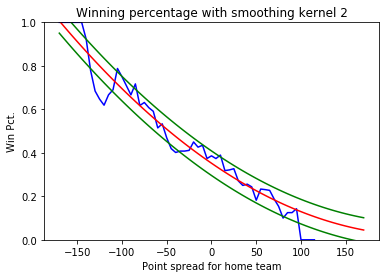

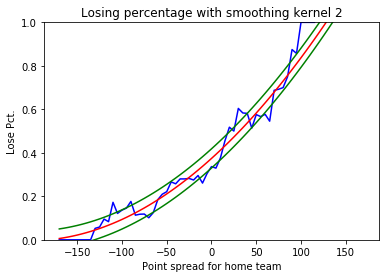

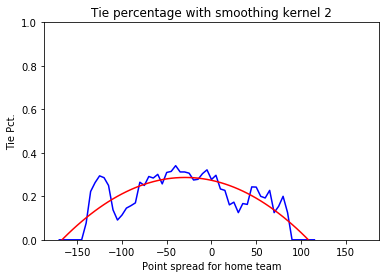

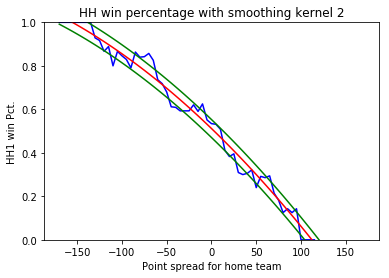

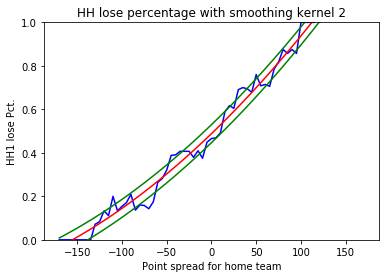

In [4]:
k = 0
print('In what follows y denotes the spread:')
for l in leagues:
    print()
    print('### league:', l)
    data = np.zeros((siz, 8))
    data[:, 0] = lines
    
    for wk in range(start_week[k], end_week[k] + 1):
        print('week:', wk)
        f = open(l + '/Week' + str(wk) + '/Results_w' + str(wk) + '.txt')
        Results = list(f)
        g = open(l + '/Week' + str(wk) + '/Lines_w' + str(wk) + '.txt')
        Lines = list(g)

        for i in range(len(Results)):
            j1 = Results[i].index('\t')
            j2 = Results[i].index('\t', j1 + 1)
            j3 = Results[i].index('\t', j2 + 1)
            home = int(Results[i][j2 + 1])
            away = int(Results[i][j3 - 2])
            line1 = float(Lines[i][0:5])
            line2 = int(line1*100)
            #print(home, away, line1, line2)
            ind = lines == line2
            #print(ind)
            data[ind, 1] += 1.
            data_all[ind, 1] += 1.
            if home - away > 0:
                data[ind, 2] += 1.
                data_all[ind, 2] += 1.
                if home - away >= 2:
                    data[ind, 5] += 1.
                    data_all[ind, 5] += 1.  
            elif home - away < 0:
                data[ind, 4] += 1.
                data_all[ind, 4] += 1.
                if home - away <= -2:
                    data[ind, 6] += 1.
                    data_all[ind, 6] += 1.
            else:
                data[ind, 3] += 1.
                data_all[ind, 3] += 1.
            data[ind, 7] += home - away
            data_all[ind, 7] += home - away
        
        #print('data:')
        #print(data)
        #print()
        #print('data_all:')
        #print(data_all)
        #print()

        f.close()
        g.close()
    
    k += 1
    
print()
print('### TOTAL:')

# one bin:
games = np.sum(data_all[:, 1])
wins = np.sum(data_all[:, 2])
ties = np.sum(data_all[:, 3])
losses = np.sum(data_all[:, 4])
margin2 = np.sum(data_all[:, 5])
margin3 = np.sum(data_all[:, 6])
diff = np.sum(data_all[:, 7])
print()
print('1 bin:')
print()
redpr('{:3d}'.format(-40) + '<= y <' + '{:3d}'.format(40) + ':  d.pts: {0:5.0f}    win: {1:5.0f}   X: {2:5.0f}   loss: {3:5.0f}   avg. margin: {4:5.2f}'.format(games, wins, ties, losses, diff/games))
print('               percentages     win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}   1X: {4:5.2f}   X2: {5:5.2f}'.format(games, wins/games, ties/games, losses/games, (wins + ties)/games, (losses + ties)/games))
redpr('               odds            win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}   1X: {4:5.2f}   X2: {5:5.2f}'.format(games, games/wins, games/ties, games/losses, games/(wins + ties), games/(losses + ties)))
print('       >=2 goals difference in win: {0:5.0f}  percentage: {1:5.2f}  odds: {2:5.2f}'.format(margin2, margin2/games, games/margin2))
print('       <=-2 goals difference in loss: {0:5.0f}  percentage: {1:5.2f}  odds: {2:5.2f}'.format(margin3, margin3/games, games/margin3))
    
print()
print('all bins:')
x_data = []
y1_data = []
y2_data = []
yX_data = []
HH1_data = []
HH2_data = []
games_data = []


f = open('odds_all.txt', 'w')
for i in range(conv_kernel, len(lines) - conv_kernel):
    #print('i', i, np.arange(i - conv_kernel, i + conv_kernel + 1))
    games = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 1])
    wins = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 2])
    ties = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 3])
    losses = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 4])
    margin2 = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 5])
    margin3 = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 6])
    diff = np.sum(data_all[i - conv_kernel:i + conv_kernel + 1, 7])
    #print()
    #redpr('{:5.2f}'.format(lines[i]/100.) + ':  d.pts: {0:5.0f}    win: {1:5.0f}   X: {2:5.0f}   loss: {3:5.0f}   avg. margin: {4:5.2f}'.format(games, wins, ties, losses, diff/games))
    #print('               percentages     win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}   1X: {4:5.2f}   X2: {5:5.2f}'.format(games, wins/games, ties/games, losses/games, (wins + ties)/games, (losses + ties)/games))
    #redpr('               odds            win: {1:5.2f}   X: {2:5.2f}   loss: {3:5.2f}   1X: {4:5.2f}   X2: {5:5.2f}'.format(games, games/wins, games/ties, games/losses, games/(wins + ties), games/(losses + ties)))
    #f.write('{0:5.2f}   d.pts: {1:5.0f}   win: {2:5.2f}   X: {3:5.2f}   loss: {4:5.2f}   1X: {5:5.2f}   X2: {6:5.2f}   2goals: {7:5.2f}\n'.format(lines[i]/100., games, games/wins, games/ties, games/losses, games/(wins + ties), games/(losses + ties), games/margin2))
    #print('       >=2 goals difference in win: {0:5.0f}  percentage: {1:5.2f}  odds: {2:5.2f}'.format(margin2, margin2/games, games/margin2))
    #f.write('>=2 goals difference in win: {:5.2f}\n'.format(games/margin2))
    #print('       <=-2 goals difference in loss: {0:5.0f}  percentage: {1:5.2f}  odds: {2:5.2f}'.format(margin3, margin3/games, games/margin3))
    
    x_data.append(lines[i])
    y1_data.append(wins/games)
    y2_data.append(losses/games)
    yX_data.append(ties/games)
    HH1_data.append(wins/(wins + losses))
    HH2_data.append(losses/(wins + losses))
    games_data.append(games)
    
f.close()

p1, res1, rnk1, sv1, rcond1 = np.polyfit(x_data[:-15], y1_data[:-15], 2, full = True)#, w = games_data[:-15])
p2, res2, rnk2, sv2, rcond2 = np.polyfit(x_data[:-15], y2_data[:-15], 2, full = True)#, w = games_data[:-15])
tie_pct = 1.0 - (np.array(x_data)**2*p1[0] + np.array(x_data)*p1[1] + p1[2]) - (np.array(x_data)**2*p2[0] + np.array(x_data)*p2[1] + p2[2])
p3, res3, rnk3, sv3, rcond3 = np.polyfit(x_data[:-15], HH1_data[:-15], 2, full = True)
p4, res4, rnk4, sv4, rcond4 = np.polyfit(x_data[:-15], HH2_data[:-15], 2, full = True)

std1 = np.sqrt(res1/len(x_data[:-15]))
std2 = np.sqrt(res2/len(x_data[:-15]))
std3 = np.sqrt(res3/len(x_data[:-15]))
std4 = np.sqrt(res4/len(x_data[:-15]))

plt.figure()
plt.plot(x_data, y1_data, 'b', x_data, np.array(x_data)**2*p1[0] + np.array(x_data)*p1[1] + p1[2], 'r'
        , x_data, np.array(x_data)**2*p1[0] + np.array(x_data)*p1[1] + p1[2] + std1, 'g'
        , x_data, np.array(x_data)**2*p1[0] + np.array(x_data)*p1[1] + p1[2] - std1, 'g')
plt.title('Winning percentage with smoothing kernel ' + str(conv_kernel))
plt.xlabel('Point spread for home team')
plt.ylabel('Win Pct.')
plt.ylim([0, 1])

plt.figure()
plt.plot(x_data, y2_data, 'b', x_data, np.array(x_data)**2*p2[0] + np.array(x_data)*p2[1] + p2[2], 'r'
        , x_data, np.array(x_data)**2*p2[0] + np.array(x_data)*p2[1] + p2[2] + std2, 'g'
        , x_data, np.array(x_data)**2*p2[0] + np.array(x_data)*p2[1] + p2[2] - std2, 'g')
plt.title('Losing percentage with smoothing kernel ' + str(conv_kernel))
plt.xlabel('Point spread for home team')
plt.ylabel('Lose Pct.')
plt.ylim([0, 1])

plt.figure()
plt.plot(x_data, yX_data, 'b', x_data, tie_pct, 'r')
plt.title('Tie percentage with smoothing kernel ' + str(conv_kernel))
plt.xlabel('Point spread for home team')
plt.ylabel('Tie Pct.')
plt.ylim([0, 1])

plt.figure()
plt.plot(x_data, HH1_data, 'b', x_data, np.array(x_data)**2*p3[0] + np.array(x_data)*p3[1] + p3[2], 'r'
        , x_data, np.array(x_data)**2*p3[0] + np.array(x_data)*p3[1] + p3[2] + std3, 'g'
        , x_data, np.array(x_data)**2*p3[0] + np.array(x_data)*p3[1] + p3[2] - std3, 'g')
plt.title('HH win percentage with smoothing kernel ' + str(conv_kernel))
plt.xlabel('Point spread for home team')
plt.ylabel('HH1 win Pct.')
plt.ylim([0, 1])

plt.figure()
plt.plot(x_data, HH2_data, 'b', x_data, np.array(x_data)**2*p4[0] + np.array(x_data)*p4[1] + p4[2], 'r'
        , x_data, np.array(x_data)**2*p4[0] + np.array(x_data)*p4[1] + p4[2] + std4, 'g'
        , x_data, np.array(x_data)**2*p4[0] + np.array(x_data)*p4[1] + p4[2] - std4, 'g')
plt.title('HH lose percentage with smoothing kernel ' + str(conv_kernel))
plt.xlabel('Point spread for home team')
plt.ylabel('HH1 lose Pct.')
plt.ylim([0, 1])

f = open('odds_fit.txt', 'w')
for i in range(conv_kernel, len(lines) - 15):
    win_pct = x_data[i]**2*p1[0] + x_data[i]*p1[1] + p1[2]
    del_win = 1.0/(win_pct - std1[0]) - 1.0/win_pct
    lose_pct = x_data[i]**2*p2[0] + x_data[i]*p2[1] + p2[2]
    del_lose = 1.0/(lose_pct - std2[0]) - 1.0/lose_pct
    
    HHwin_pct = x_data[i]**2*p3[0] + x_data[i]*p3[1] + p3[2]
    del_HHwin = 1.0/(HHwin_pct - std3[0]) - 1.0/HHwin_pct
    HHlose_pct = x_data[i]**2*p4[0] + x_data[i]*p4[1] + p4[2]
    del_HHlose = 1.0/(HHlose_pct - std4[0]) - 1.0/HHlose_pct
    
    f.write('{0:5.2f}   win: {1:5.2f} {2:+5.2f}   X: {3:5.2f}   loss: {4:5.2f} {5:+5.2f}        HH1: {6:5.2f} {7:5.2f}   HH2: {8:5.2f} {9:5.2f}\n'.format(
        lines[i]/100., 1.0/win_pct, del_win, 1.0/tie_pct[i], 1.0/lose_pct, del_lose, 
        1.0/HHwin_pct, del_HHwin, 1.0/HHlose_pct, del_HHlose))

f.close()

In [5]:
Results

['Fri. 1 Mar. 18:30 \t Holstein Kiel - Union Berlin \t0 - 2 \t(0-1)\n',
 'Fri. 1 Mar. 18:30 \t MSV Duisburg - Magdeburg \t1 - 0 \t(0-0)\n',
 'Sat. 2 Mar. 13:00 \t Heidenheim - Regensburg \t1 - 2 \t(0-1)\n',
 'Sat. 2 Mar. 13:00 \t Paderborn - Sankt Pauli \t0 - 1 \t(0-0)\n',
 'Sat. 2 Mar. 13:00 \t Sandhausen - Erzgebirge Aue \t0 - 3 \t(0-1)\n',
 'Sun. 3 Mar. 13:30 \t Bielefeld - Darmstadt \t1 - 0 \t(1-0)\n',
 'Sun. 3 Mar. 13:30 \t Dynamo Dresden - Bochum \t2 - 2 \t(1-2)\n',
 'Sun. 3 Mar. 13:30 \t FC Ingolstadt - FC Köln \t1 - 2 \t(0-1)\n',
 'Mon. 4 Mar. 20:30 \t Hamburger SV - Greuther Fürth \t1 - 0 \t(0-0) ']